In [7]:

import matplotlib.pyplot as plt
from random import seed
import seaborn as sns
import numpy as np
import scipy as sp

from util import time_algorithm
from juego import jugar

In [8]:
seed(12345)
np.random.seed(12345)
sns.set_theme()

In [9]:
def generar_resultados(generador_de_monedas, maxima_cantidad_monedas):
    x = np.linspace(1, maxima_cantidad_monedas, 500).astype(int)
    return x, time_algorithm(jugar, x, lambda s: [generador_de_monedas(s)])

def ajustar_mediciones(x, resultados):
    f = lambda x, c1, c2: c1 * x + c2
    c, _ = sp.optimize.curve_fit(f, x, [resultados[n] for n in x])
    r = np.sum((c[0] * x + c[1] - [resultados[n] for n in x]) ** 2)
    return c[0], c[1], r

def graficar(generador_de_monedas, maxima_cantidad_monedas, titulo):
    x, resultados = generar_resultados(generador_de_monedas, maxima_cantidad_monedas)
    c1, c2, r = ajustar_mediciones(x, resultados)

    ax: plt.Axes
    _, ax = plt.subplots()
    ax.plot(x, [resultados[i] for i in x], label="Medición")
    ax.set_title(titulo)
    ax.set_xlabel('Tamaño del array')
    ax.set_ylabel('Tiempo de ejecución (s)')

    # Ajuste
    ax.plot(x, [c1 * n + c2 for n in x], 'r--', label="Ajuste")
    ax.legend()

    print(f"La recta que mejor ajusta es: {c1} * x + {c2}")
    print(f"El error cuadratico total es: {r}")

# Monedas Aleatorias

La recta que mejor ajusta es: 5.28773969595301e-07 * x + 0.0009574652092116414
El error cuadratico total es: 0.001333743648679607


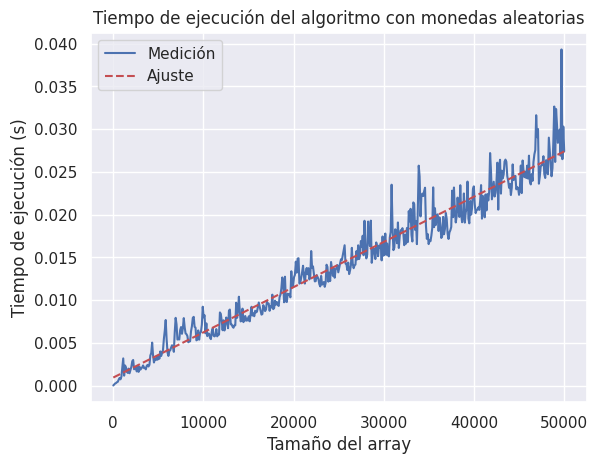

In [13]:
def generar_fila_de_monedas_aleatorias(size):
    return np.random.randint(1, 1000, size)

graficar(generar_fila_de_monedas_aleatorias, 50_000, 'Tiempo de ejecución del algoritmo con monedas aleatorias')

# Monedas Iguales

La recta que mejor ajusta es: 2.9882380547834413e-07 * x + 0.0006190522254713452
El error cuadratico total es: 0.0006407625218309754


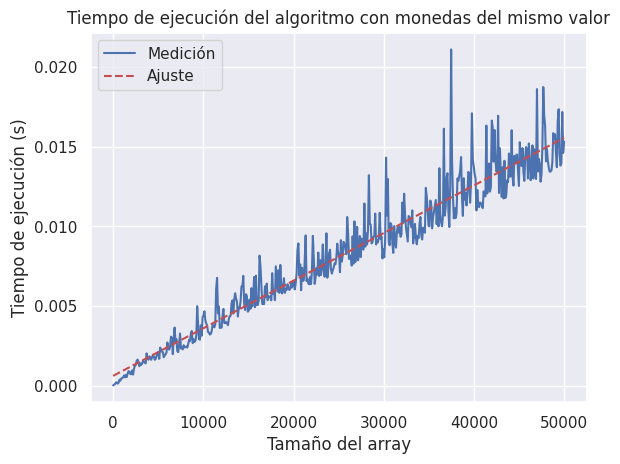

In [31]:
def generar_monedas_mismo_valor(size):
    return [1] * size

graficar(generar_monedas_mismo_valor, 50_000, 'Tiempo de ejecución del algoritmo con monedas del mismo valor')

# Monedas Ordenadas Ascendentemente

La recta que mejor ajusta es: 3.169995272493899e-07 * x + 0.0008370869950572079
El error cuadratico total es: 0.0007624712964047885


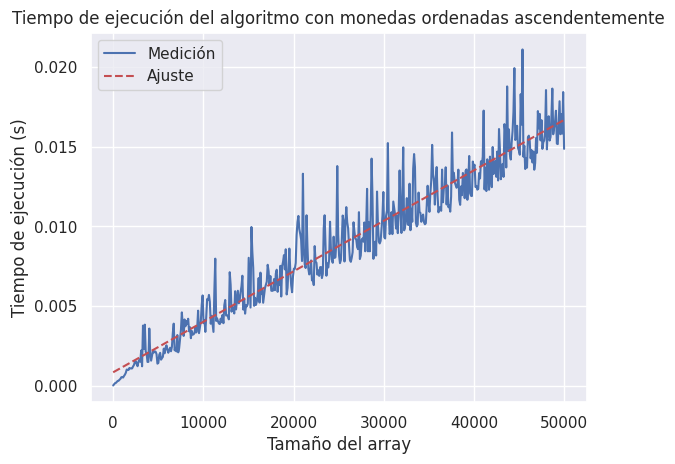

In [22]:
def generar_monedas_ascendente(size):
    return [i for i in range(1, size + 1)]

graficar(generar_monedas_ascendente, 50_000, 'Tiempo de ejecución del algoritmo con monedas ordenadas ascendentemente')